# EXPLORATORY DATA ANALYSIS OF AIRBNB DATASET

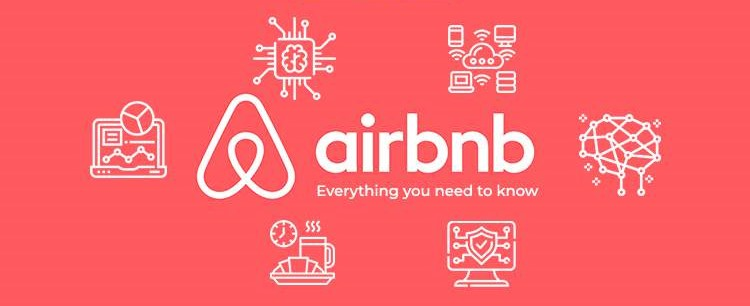


# **DESCRIPTION**

Our project focuses on understanding how different factors affect Airbnb prices in New York City and finding patterns in the data. We carefully explore and clean the dataset to provide helpful insights for travelers, hosts, and Airbnb businesses. This process ensures that the data we use is accurate and reliable.

We pay close attention to detail, identifying and fixing any problems or inconsistencies in the dataset to make sure it's trustworthy. By analyzing the data thoroughly, we discover useful insights that can guide decision-making and improve understanding of the Airbnb market in New York City.

Our goal is to make the data easier to understand and use, empowering people to make better decisions. Through our work, we aim to enhance the experiences of both hosts and guests in the busy city of New York.


# **UNDERSTAND THE GIVEN VARIABLES**
Listing_id :- This is a unique identifier for each listing in the dataset.

Listing_name :- This is the name or title of the listing, as it appears on the Airbnb website.

Host_id :- This is a unique identifier for each host in the dataset.

Host_name :- This is the name of the host as it appears on the Airbnb website.

Neighbourhood_group :- This is a grouping of neighborhoods in New York City, such as Manhattan or Brooklyn.

Neighbourhood :- This is the specific neighborhood in which the listing is located.

Latitude :- This is the geographic latitude of the listing.

Longitude :- This is the geographic longitude of the listing.

Room_type :- This is the type of room or property being offered, such as an entire home, private room, shared room.

Price :- This is the nightly price for the listing, in US dollars.

Minimum_nights :- This is the minimum number of nights that a guest must stay at the listing.

Total_reviews :- This is the total number of reviews that the listing has received.

Reviews_per_month :- This is the average number of reviews that the listing receives per month.

Host_listings_count :- This is the total number of listings that the host has on Airbnb.

Availability_365 :- This is the number of days in the next 365 days that the listing is available for booking.

# **PROBLEM STATEMENTS**

(1) Find Distribution Of Airbnb Bookings Price Range.

(2) Find Total Listing/Property count in Each Neighborhood Group in NYC.

(3) Find Average Price Of listings/property in each Neighborhood Groups and also Neighborhoods.

(4) Find Top Neighborhoods and Hosts by Listing/property in entire NYC.

(5) Find the Number Of Active Hosts Per Location by Each Neighborhood Groups.

(6) Find Total Counts Of Each Room Types in entire NYC.

(7) Find Stay Requirement counts by Minimum Nights.

(8) Find the total numbers of Reviews and Maximum Reviews by Each Neighborhood Group.

(9) Find Most reviewed room type in Neighborhood groups per month.

(10) Find Best location listing/property location for travelers.

(11)  Find Best Location Listing/Property Location For Travelers and Hosts.

(12)  Correlation Heatmap Visualization.

# **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd # importing pandas and numpy for data manipulation
import numpy as np

import matplotlib.pyplot as plt # importing matplotlib and seaborn for data Visualization
import seaborn as sns

# **LOADING Airbnb Dataset**

In [ ]:
data = pd.read_csv('/content/Airbnb NYC 2019.csv') # reading csv

# **DATA EXPLORATION AND DATA CLEANING**

## **HOW MY DATA LOOKS**

In [ ]:
data.shape

(48895, 16)

## **DATATYPE OF MY COLUMNS**

In [ ]:
data.info() # info is use for checking datatype of each columns and NaN values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **CHECKING COLUMNS NAME**

In [ ]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# **OBSERVATION**

*   The column names in the dataset are not consistent, so we need to change them to make it easier to work with the data.


## **RENAME COLUMNS NAMES**

In [ ]:
# To rename columns create a rename_columns dict
rename_column = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews',
                 'calculated_host_listings_count':'host_listings_count'}
# Using rename method.
data = data.rename(columns = rename_column)
data.head(5)

listing_id                                      listing_name  host_id  \
0        2539                Clean & quiet apt home by the park     2787   
1        2595                             Skylit Midtown Castle     2845   
2        3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3        3831                   Cozy Entire Floor of Brownstone     4869   
4        5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  total_reviews last_review  \
0     Private room    149               1              9  2018-10-19   
1  Entire home/apt    225               1             45  2019-05-21   
2     Private room    150               3              0         NaN   
3  Entire home/apt     89               1            270  2019-07-05   
4  Entire home/apt     80              10              9  2018-11-19   

   reviews_per_month  host_listings_count  availability_365  
0               0.21                    6               365  
1               0.38                    2               355  
2                NaN                    1               365  
3               4.64                    1               194  
4               0.10                    1                 0

## **MATHEMATICAL OVERVIEW OF THE DATASET**

In [ ]:
data.describe()

listing_id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  total_reviews  reviews_per_month  host_listings_count  \
count    48895.000000   48895.000000       38843.000000         48895.000000   
mean         7.029962      23.274466           1.373221             7.143982   
std         20.510550      44.550582           1.680442            32.952519   
min          1.000000       0.000000           0.010000             1.000000   
25%          1.000000       1.000000           0.190000             1.000000   
50%          3.000000       5.000000           0.720000             1.000000   
75%          5.000000      24.000000           2.020000             2.000000   
max       1250.000000     629.000000          58.500000           327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

# **OBSERVATION**



*   **PRICE** : The average price of ticket is 153 ruppe.
*   **PERCENTILE (25%, 50%, and 75%)**: The 75th percentile of the price is 175, indicating that 75% of listings have a price of 175 or lower.



*   **REVIEW**: The average review total review 23.27(Aprox)








## **CHECKING NULL VALUES**

In [ ]:
data.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

# **OBSERVATION**



*    There are some null values present in the columns of the dataset.



## **REMOVING NULL VALUES**

In [ ]:
# replacing Nan Value with unknown from listing name columns
data['listing_name'].fillna('unknown',inplace=True)

# replacing Nan Value with unknown from host name columns
data['host_name'].fillna('unknown',inplace=True)

## **CHECKING UNIQUE VALUES**

In [ ]:
data.nunique()

listing_id             48895
listing_name           47906
host_id                37457
host_name              11453
neighbourhood_group        5
neighbourhood            221
latitude               19048
longitude              14718
room_type                  3
price                    674
minimum_nights           109
total_reviews            394
last_review             1764
reviews_per_month        937
host_listings_count       47
availability_365         366
dtype: int64

# **OBSERVATION**



*    There are 3 types of room and 5 types of neighbourhood group into dataset.



#**DETECTING OUTLIER**

<Axes: xlabel='price'>

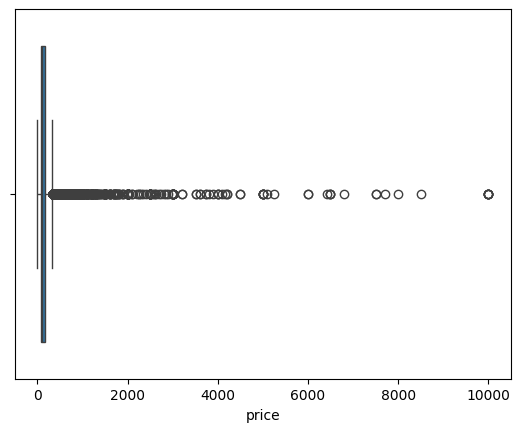

In [ ]:
sns.boxplot(x = data['price']) # detecting outlier from price using boxplot

# **REMOVEING OUTLIER**

*   # **USING IQR TECHNIQUE TO REMOVE OUTLIER**



In [ ]:
# writing a outlier function for removing outliers in important columns.
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
#interquantile range
  return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = iqr_technique(data['price'])

data = data[(data.price>lower_bound) & (data.price<upper_bound)]

(45918, 16)


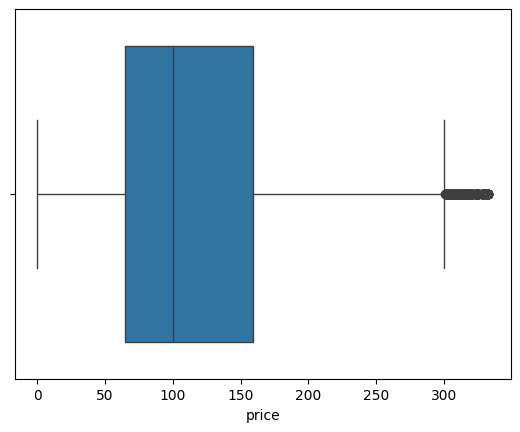

In [ ]:
# Outlier removed
sns.boxplot(x = data['price'])
print(data.shape)

In [ ]:
print("The maximum price is",data['price'].max())

The maximum price is 333


# **Q1 Find Distribution of Airbnb bookings and price range ?**

<ipython-input-17-21e3eb4fa025>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'],color=('m'))


Text(0.5, 1.0, 'Distribution of Airbnb Prices')

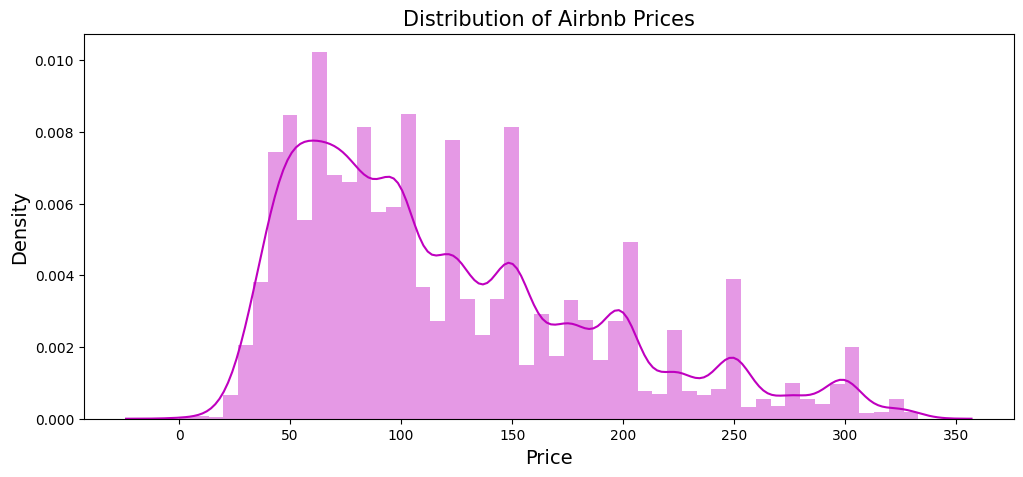

In [ ]:
# Set figuresize
plt.figure(figsize=(12, 5))

sns.distplot(data['price'],color=('m'))

# Add labels to the x-axis and y-axis
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)

# **Q2. Find Total Listing/Property count in Each Neighborhood Group in NYC.**

<ipython-input-18-5cfd10185525>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_count = nei[['neighbourhood_group','host_listings_count']].sum()


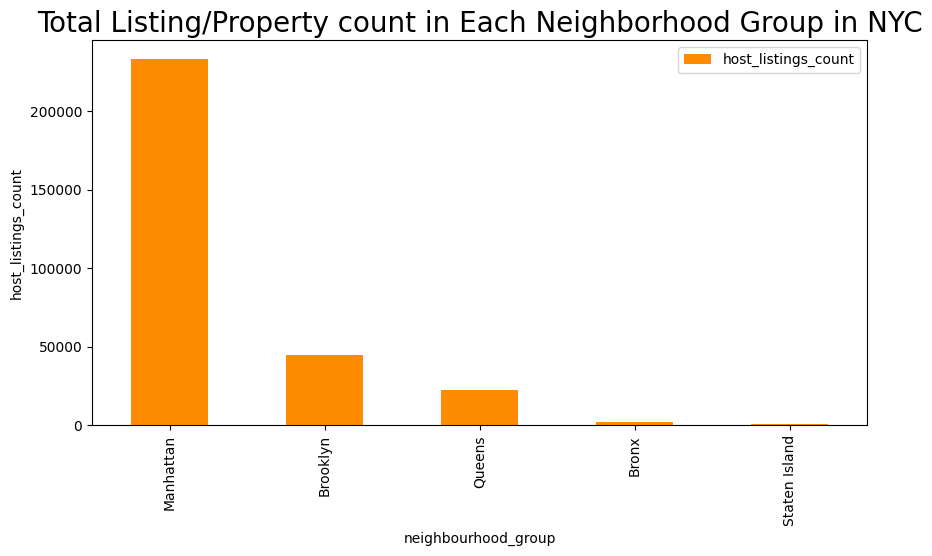

In [ ]:
nei = data.groupby(['neighbourhood_group'])
total_count = nei[['neighbourhood_group','host_listings_count']].sum()
total_count = total_count.sort_values(['host_listings_count'],ascending = False)
total_count.plot(kind ='bar',figsize=(10,5),color = 'darkorange',fontsize=10)
plt.xlabel('neighbourhood_group')
plt.ylabel('host_listings_count')
plt.title('Total Listing/Property count in Each Neighborhood Group in NYC',fontsize=20)
plt.show()

# **Q3 .Find Average Price Of listings/property in each Neighborhood Groups and also Neighborhoods.**

<ipython-input-19-eb6980753dcd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = data.groupby("neighbourhood_group").mean()


Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

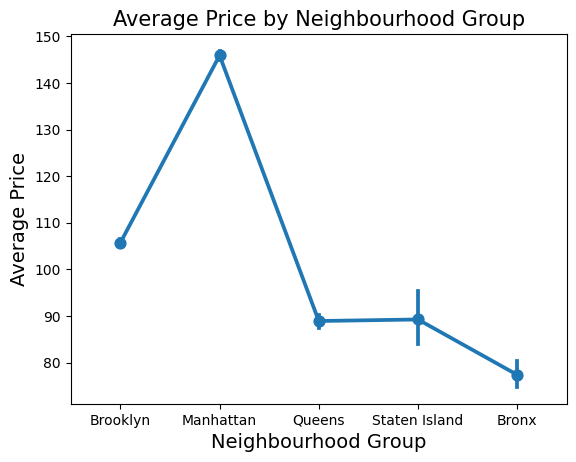

In [ ]:
grouped = data.groupby("neighbourhood_group").mean()
# Reset the index of the grouped dataframe so that the neighborhood group becomes a column
neighbourhood_group_avg_price = grouped.reset_index()
# Rename the "price" column to "avg_price"
neighbourhood_group_avg_price = round(neighbourhood_group_avg_price.rename(columns={"price": "avg_price"}),2)
# Select only the "neighbourhood_group" and "avg_price" columns
neighbourhood_group_avg_price[['neighbourhood_group', 'avg_price']].head()

# plot line plot
sns.pointplot(x = 'neighbourhood_group', y='price',data=data, estimator = np.mean)
# Add axis labels and a title
plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)

# **Q4. Find Top Neighborhoods and Hosts by Listing/property in entire NYC.**

Text(0.5, 1.0, 'Listings by Top Neighborhoods in NYC')

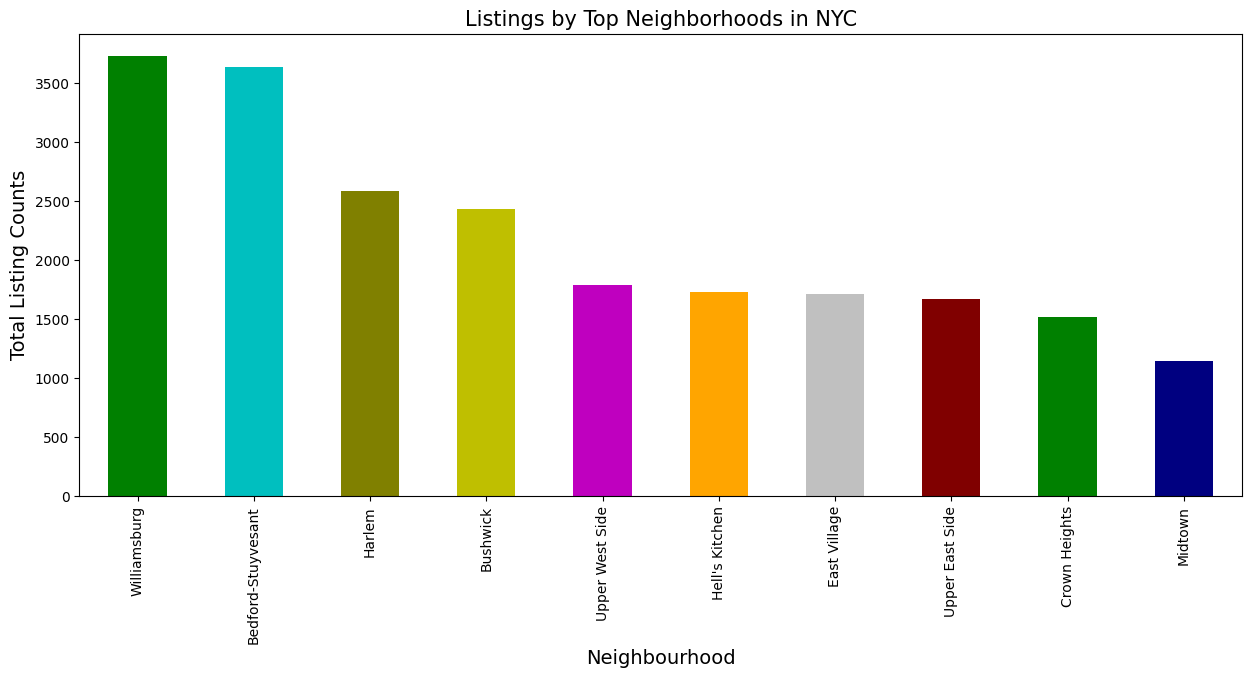

In [ ]:
top_10_neigbourhoods = data['neighbourhood'].value_counts().nlargest(10)


colors = ['g', 'c', 'olive', 'y', 'm', 'orange', '#C0C0C0', '#800000', '#008000', '#000080']
top_10_neigbourhoods.plot(kind='bar', figsize=(15, 6), color = colors)

# Set the x-axis label
plt.xlabel('Neighbourhood', fontsize=14)

# Set the y-axis label
plt.ylabel('Total Listing Counts', fontsize=14)

# Set the title of the plot
plt.title('Listings by Top Neighborhoods in NYC', fontsize=15)

# **Q5. Find the Number Of Active Hosts Per Location by Each Neighborhood Groups.**

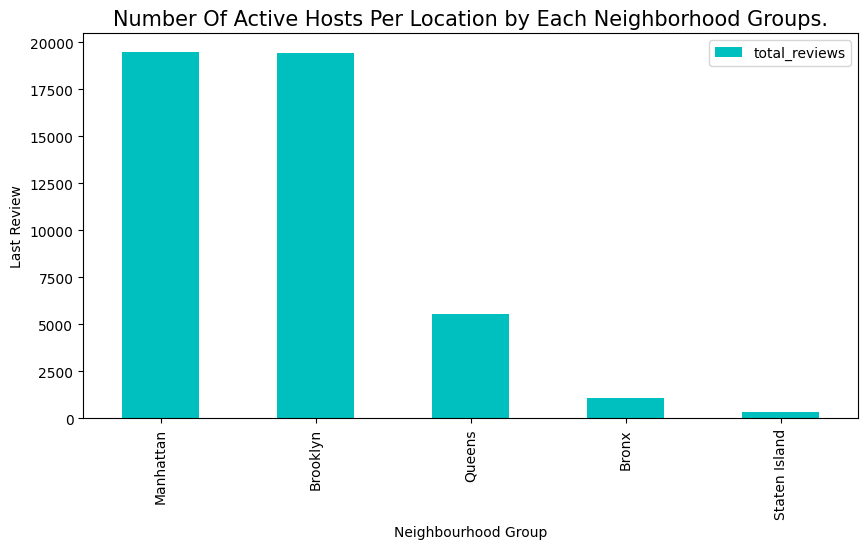

In [ ]:
neighber = data.groupby(['neighbourhood_group'])
active_host = neighber[['total_reviews']].count()
active_host = active_host.sort_values(['total_reviews'],ascending=False)

# plot bar plot
active_host.plot(kind ='bar',figsize=(10,5),color = 'c',fontsize=10)
# Set labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Last Review')
plt.title('Number Of Active Hosts Per Location by Each Neighborhood Groups.',fontsize=15)
# Show plot
plt.show()

# **Q6. Find Total Counts Of Each Room Types in entire NYC.**

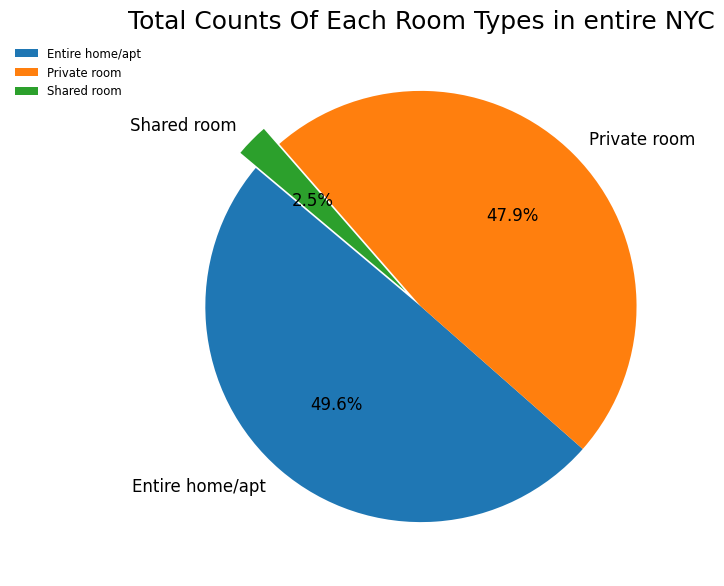

In [ ]:
room = data.groupby(['room_type'])
room_count = room[['room_type']].count()

# pie chart
room_count.plot(kind='pie',stacked=True, figsize=(10,7),fontsize=12, autopct='%1.1f%%', startangle=140, subplots=True,explode = (0,0,0.1))
plt.title("Total Counts Of Each Room Types in entire NYC",fontsize=18,loc='center')
plt.ylabel(' ')
plt.legend(bbox_to_anchor=(0,1),fontsize='small',frameon = False)
plt.show()

# **Q7. Find Stay Requirement counts by Minimum Nights.**

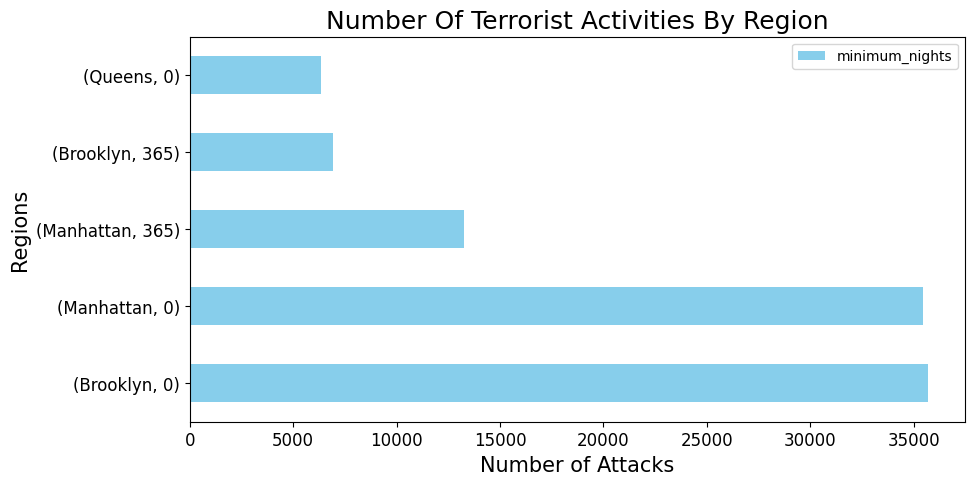

In [ ]:
stay = data.groupby(['neighbourhood_group','availability_365'])
stay_sum = stay[['minimum_nights']].sum()
minimum_n = stay_sum.sort_values(['minimum_nights'],ascending=False)
minimum_n = minimum_n.head()

minimum_n.plot(kind='barh',color='skyblue',figsize=(10,5),fontsize=12)
plt.ylabel('Regions',fontsize=15)
plt.xlabel('Number of Attacks',fontsize=15)
plt.title("Number Of Terrorist Activities By Region",fontsize=18)
plt.show()

 # **Q8. Find the total numbers of Reviews and Maximum Reviews by Each Neighborhood Group.**

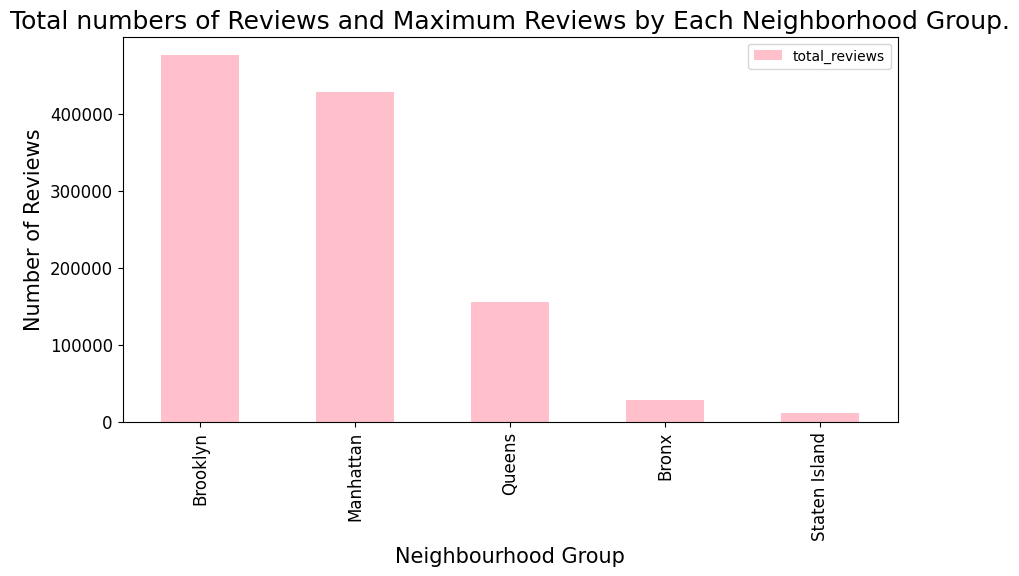

In [ ]:
reviews = data.groupby(['neighbourhood_group'])
reviews_sum = reviews[['total_reviews']].sum()
number_re = reviews_sum.sort_values(['total_reviews'],ascending=False)

number_re.plot(kind='bar',color='pink',figsize=(10,5),fontsize=12)
plt.ylabel('Number of Reviews',fontsize=15)
plt.xlabel('Neighbourhood Group',fontsize=15)
plt.title("Total numbers of Reviews and Maximum Reviews by Each Neighborhood Group.",fontsize=18)
plt.show()

# **Q9. Find Most reviewed room type in Neighborhood groups per month.**

In [ ]:
var = data.groupby(['room_type','neighbourhood_group'])
reviews_pm = var[['reviews_per_month']].sum()
reviews_pm = reviews_pm.sort_values(['reviews_per_month'],ascending = True)


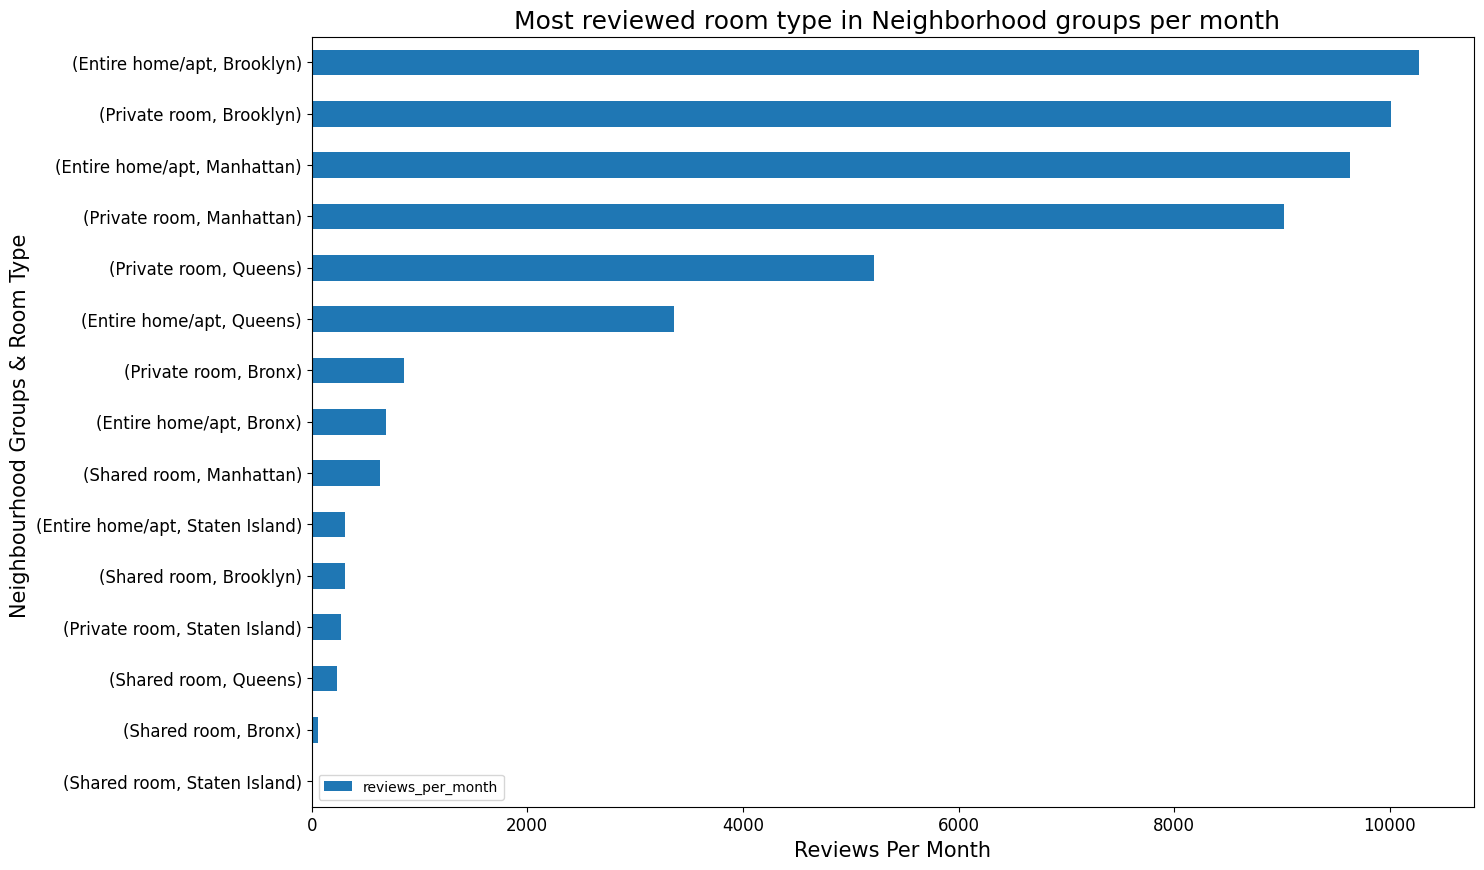

In [ ]:

reviews_pm.plot(kind='barh',figsize=(15,10),fontsize=12)
plt.ylabel('Neighbourhood Groups & Room Type ',fontsize=15)
plt.xlabel('Reviews Per Month',fontsize=15)
plt.title(" Most reviewed room type in Neighborhood groups per month",fontsize=18)
plt.show()

# **Q10. Find Best location listing/property location for travelers.**

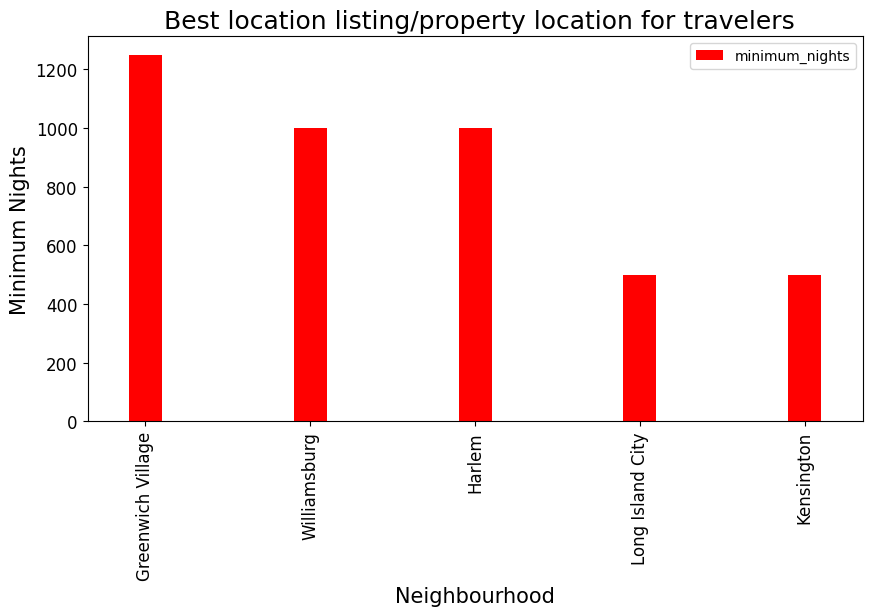

In [ ]:
locate = data.groupby(['neighbourhood'])
locate_best = locate[['minimum_nights']].max()
locate_sort = locate_best.sort_values(['minimum_nights'],ascending=False)
locate_sort = locate_sort.head(5)
locate_sort.plot(kind='bar',color= 'red',figsize=(10,5),fontsize=12,width=0.2, capsize=5)
plt.xlabel('Neighbourhood',fontsize=15)
plt.ylabel('Minimum Nights',fontsize=15)
plt.title(" Best location listing/property location for travelers",fontsize=18)
plt.show()

# **Q11. Find Best Location Listing/Property Location For Travelers and Hosts.**

<Axes: title={'center': 'Average Airbnb Reviews by Neighborhoods in New York City'}, xlabel='longitude', ylabel='latitude'>

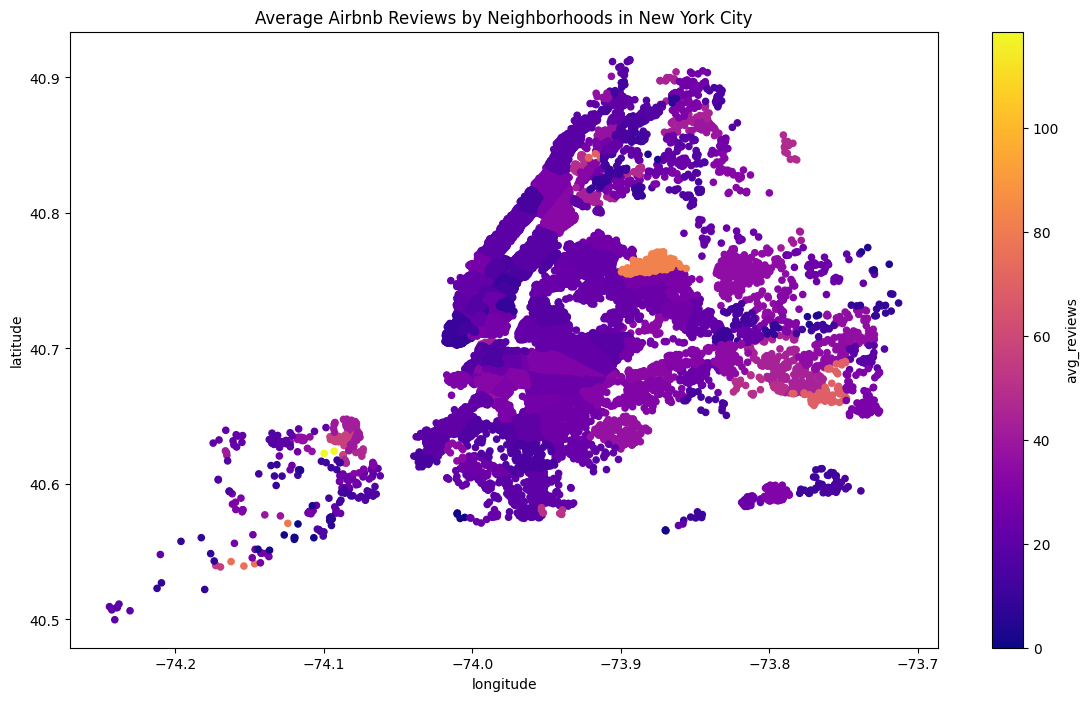

In [ ]:
# Group the data by neighborhood and calculate the average number of reviews
neighbourhood_avg_reviews = data.groupby("neighbourhood")["total_reviews"].mean()

# Create a new DataFrame with the average number of reviews for each neighborhood
neighbourhood_reviews = pd.DataFrame({"neighbourhood": neighbourhood_avg_reviews.index, "avg_reviews": neighbourhood_avg_reviews.values})

# Merge the average number of reviews data with the original DataFrame
df = data.merge(neighbourhood_reviews, on="neighbourhood")

# Create the scattermapbox plot
fig = df.plot.scatter(x="longitude", y="latitude", c="avg_reviews", title="Average Airbnb Reviews by Neighborhoods in New York City", figsize=(14,8), cmap="plasma")

# Display the scatter map
fig

# Q12. Correlation Heatmap Visualization

<ipython-input-29-5ed327de5d47>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


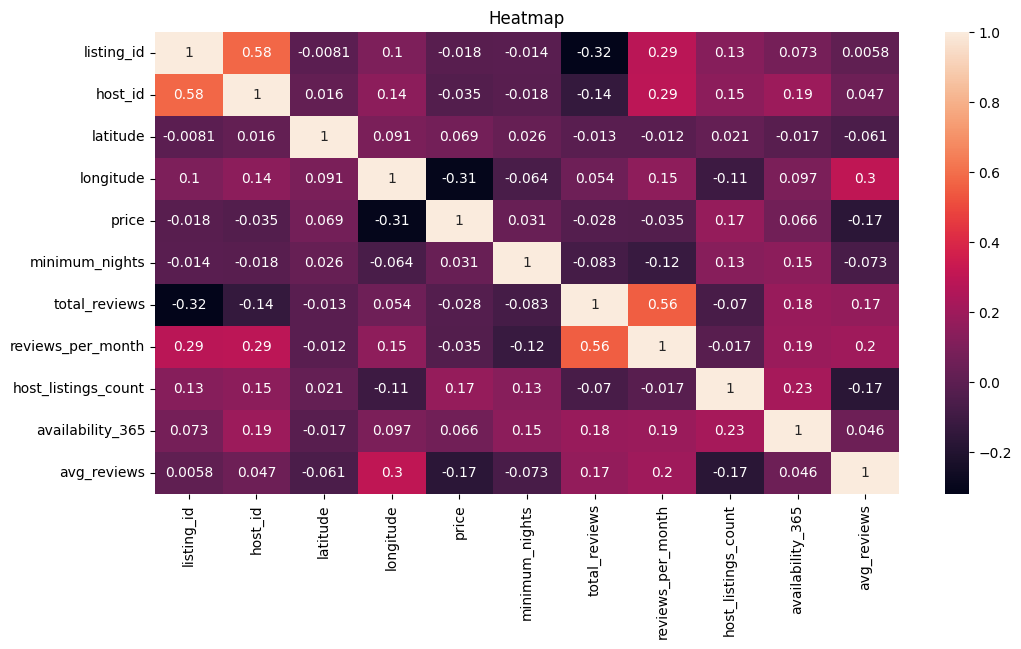

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)
plt.title("Heatmap")
plt.show()

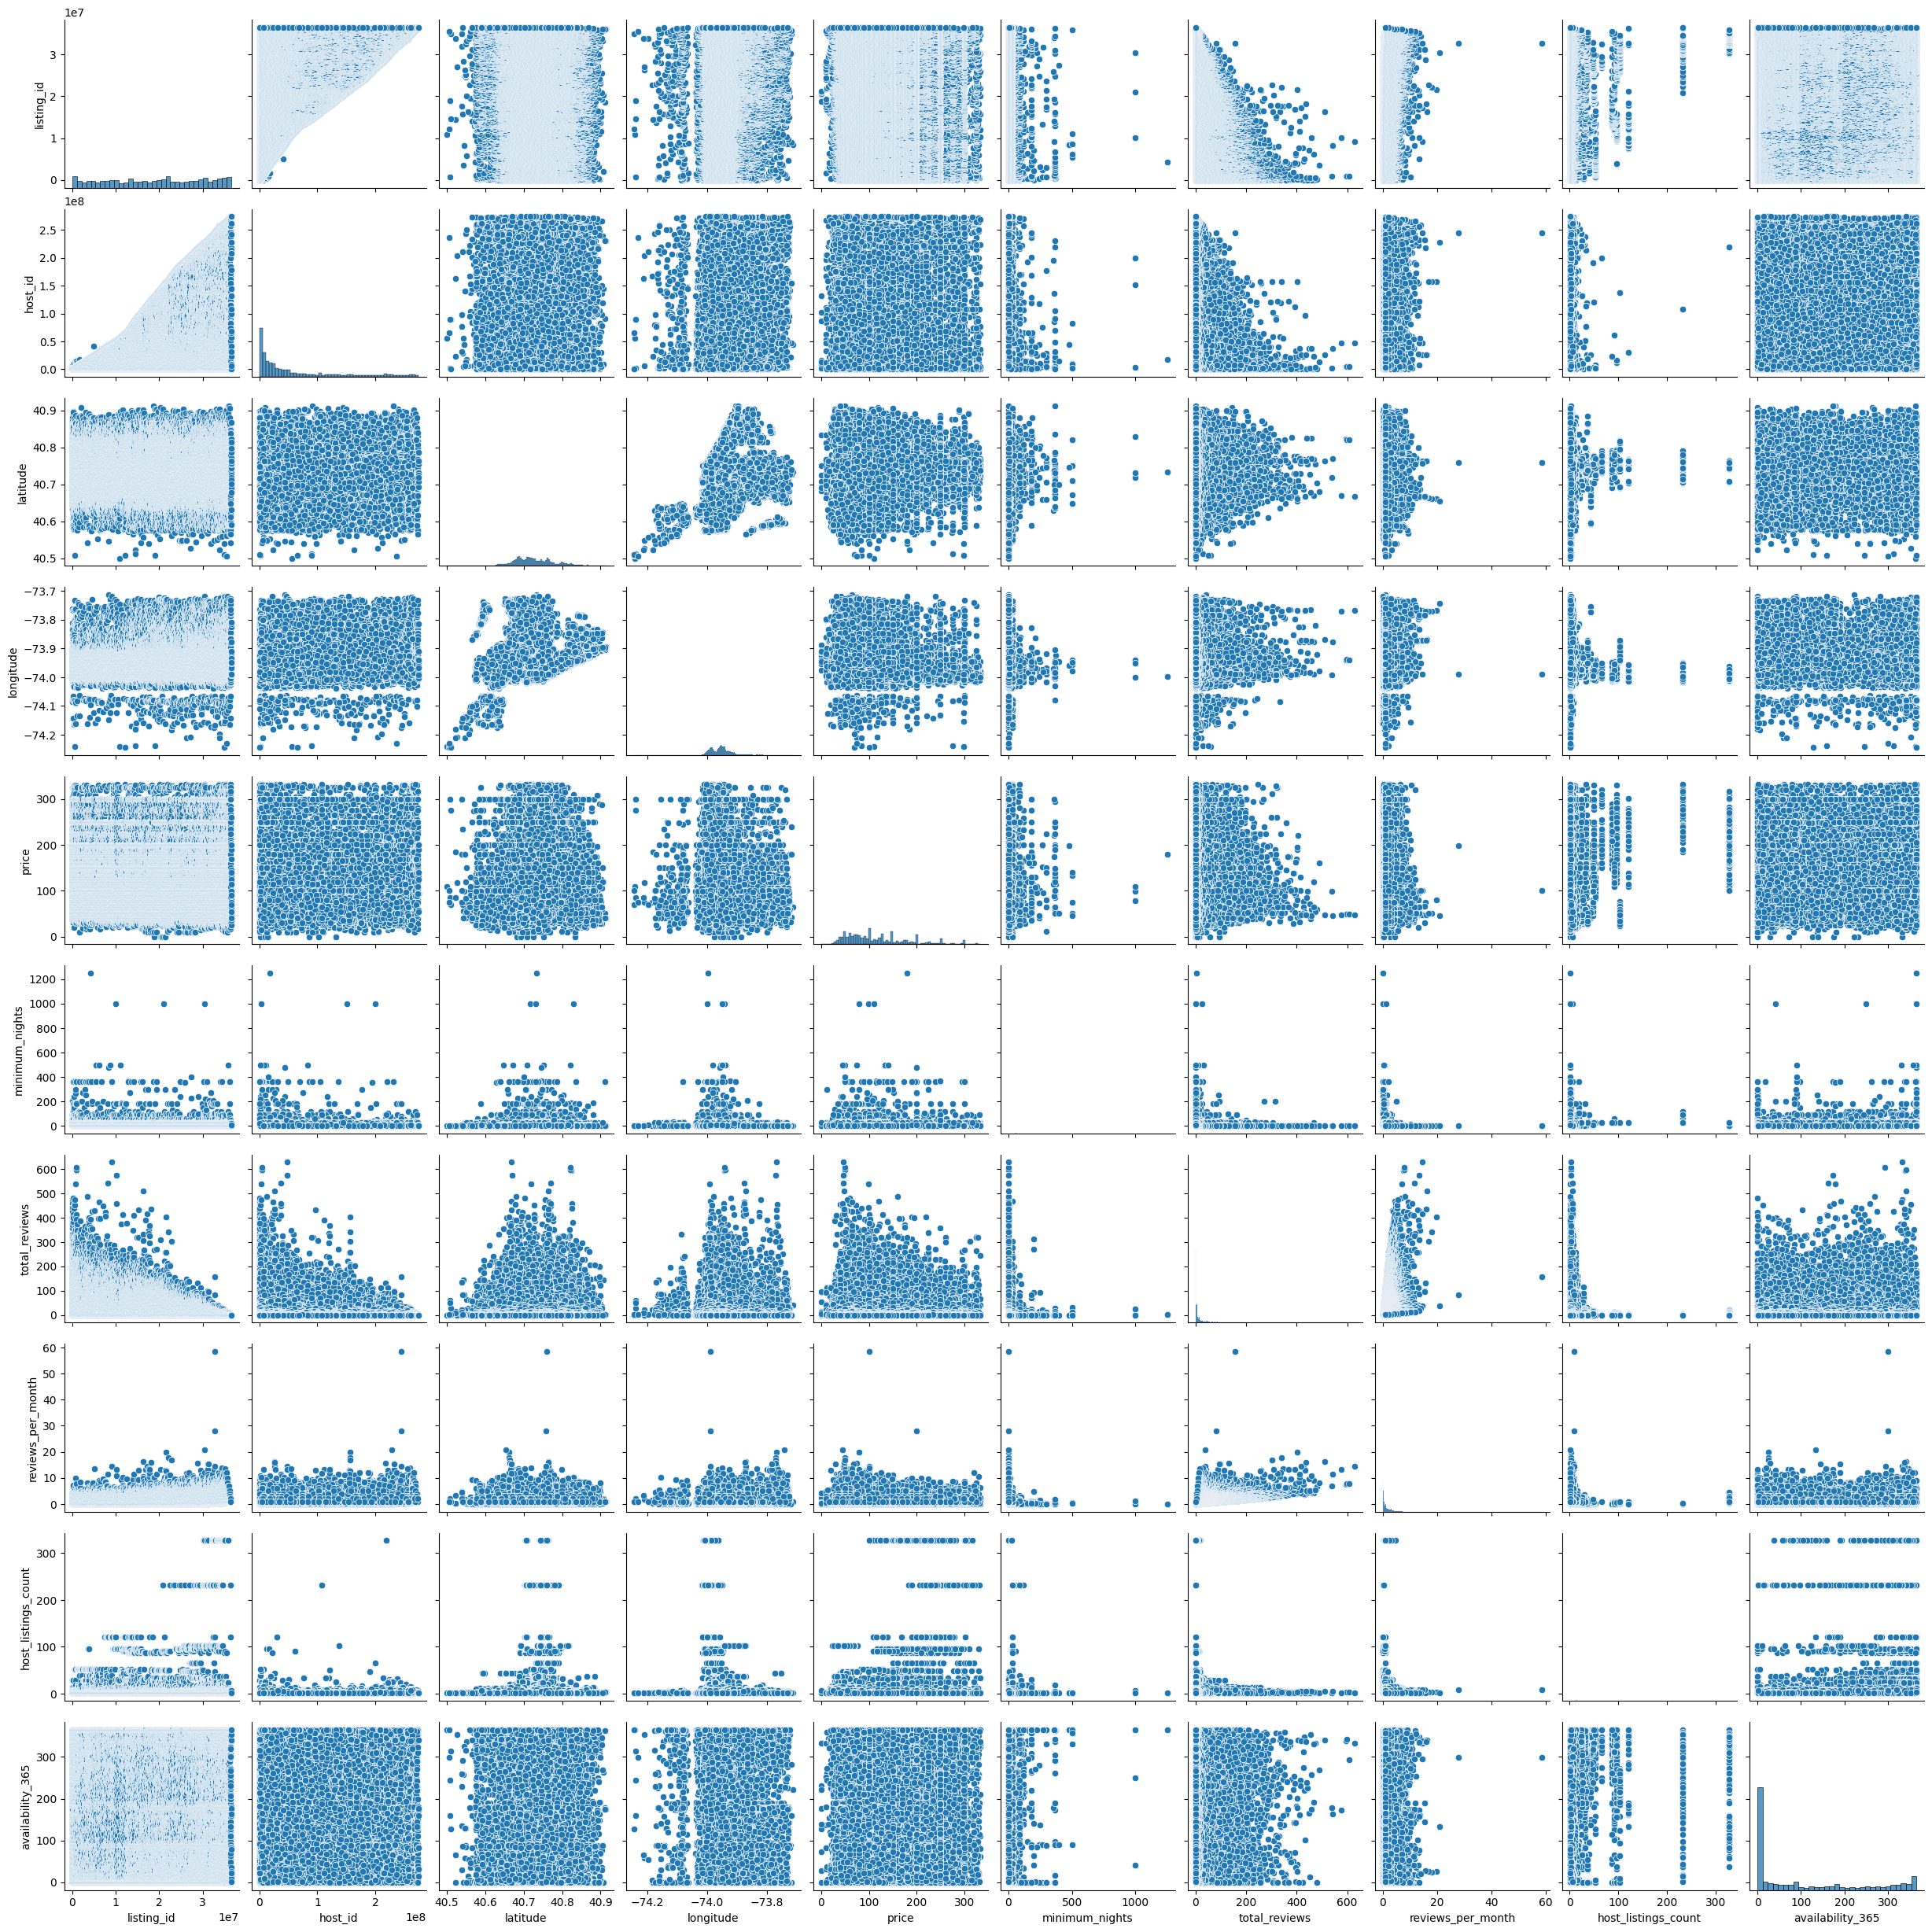

In [ ]:
sns.pairplot(data=data)


# **CONCLUSION:**

1. **Prime Locations:** Manhattan and Brooklyn boast the highest demand for Airbnb rentals, presenting lucrative investment prospects for hosts.

2. **Manhattan's Allure:** With its iconic landmarks and bustling tourism, Manhattan commands higher prices, attracting discerning travelers.

3. **Brooklyn's Appeal:** Neighborhoods like Williamsburg and Bedford-Stuyvesant offer a balance of affordability and accessibility, making them sought-after destinations.

4. **Top Neighborhoods:** Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, and the Upper West Side emerge as hotspots, indicating strong market demand.

5. **Investment Strategy:** While Manhattan promises high returns, hosts should diversify into less competitive areas to stand out in the market.

6. **Short Stays:** Airbnb preferences lean towards short-term rentals, prompting hosts to cater to this trend for optimal occupancy rates.

7. **Accommodation Options:** Entire homes and private rooms dominate listings, providing guests with diverse lodging choices and hosts with flexible investment options.

8. **Neighborhood Dynamics:** Varying availability across neighborhoods underscores opportunities for hosts to tap into underserved markets.

9. **Competitive Landscape:** Despite a few hosts dominating, strategic differentiation can help hosts carve a niche and thrive in the competitive market.

10. **Airport Proximity:** Queens neighborhoods near airports attract transient visitors, offering potential for short-term stays and competitive pricing.